In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import algorithms
import plots
import preprocessing

In [2]:
DATA_PATH = Path("../data/data.mat")

# Part 1

Regularized Linear Regression
In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.

In [3]:
data = preprocessing.read_data(DATA_PATH, ("X", "y", "Xval", "yval", "Xtest", "ytest"))
x, y, x_validation, y_validation, x_test, y_test = data
x, x_validation, x_test = preprocessing.include_intercept((x, x_validation, x_test))

## Visualizing the dataset
We will begin by visualizing the dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam, y.

This dataset is divided into three parts:
* A training set that your model will learn on: X, y
* A cross validation set for determining the regularization parameter: Xval, yval
* A test set for evaluating performance. These are “unseen” examples which your model did not see during training: Xtest, ytest

The next step of ex5.m will plot the training data (Figure 1). In the following parts, you will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, you will implement polynomial regression to find a better fit to the data.

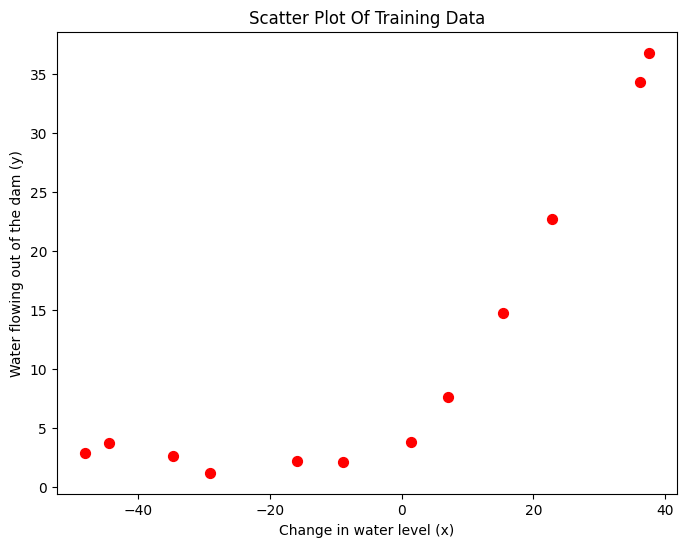

In [4]:
plots.plot_data((x, y))

## Regularized linear regression cost function
Recall that regularized linear regression has the following cost function:

$$J(\theta) = \frac{1}{2m} [ \sum_{i=1}^{m}(h_{\theta}(x^{(i)} - y^{(i)})^2 + \lambda \sum_{j=1}^{m} \theta_j^2] $$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overal cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. (In Octave/MATLAB, the $\theta_0$ term is represented as theta(1) since indexing in Octave/MATLAB starts from 1).
You should now complete the code in the file linearRegCostFunction.m. Your task is to write a function to calculate the regularized linear regression cost function. If possible, try to vectorize your code and avoid writing loops. When you are finished, the next part of ex5.m will run your cost function using theta initialized at [1; 1]. You should expect to see an output of 303.993.

In [5]:
model = algorithms.LinearRegression()

In [6]:
# the expected value of cost is 303.993
print("\nPart 1:\n")
model.theta = np.array([1, 1])
cost = model.compute_cost(x, y)
print("Computed cost with the intial value of theta:\n")
print(f"{cost: .2f}\n")


Part 1:

Computed cost with the intial value of theta:

 303.95



## Regularized linear regression gradient
Correspondingly, the partial derivative of regularized linear regression’s cost for $\theta_j$ is defined as

$$\frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \quad for\;j=0$$

$$\frac{\partial}{\partial \theta_j} J(\theta) = (\frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j \quad for\;j\ge1$$

In linearRegCostFunction.m, add code to calculate the gradient, returning it in the variable grad. When you are finished, the next part of ex5.m will run your gradient function using theta initialized at [1; 1]. You should expect to see a gradient of [-15.30; 598.250].

In [7]:
# the expected value of cost is -15.30, 598.250
model.theta = np.array([1, 1])
gradient = model.compute_cost_gradient(x, y)
grad1, grad2 = gradient
print("Computed cost gradient with the intial value of theta:\n")
print(f"{grad1}, {grad2}\n")

Computed cost gradient with the intial value of theta:

[-15.30301567 -15.30301567], [598.16741084 598.16741084]



## Fitting linear regression
Once your cost function and gradient are working correctly, the next part of
ex5.m will run the code in trainLinearReg.m to compute the optimal values of θ. This training function uses fmincg to optimize the cost function.
In this part, we set regularization parameter λ to zero. Because our
current implementation of linear regression is trying to fit a 2-dimensional θ,
regularization will not be incredibly helpful for a θ of such low dimension. In
the later parts of the exercise, you will be using polynomial regression with
regularization.

In [8]:
model.fit(x, y)

Finally, the ex5.m script should also plot the best fit line, resulting in
an image similar to Figure 2. The best fit line tells us that the model is
not a good fit to the data because the data has a non-linear pattern. While
visualizing the best fit as shown is one possible way to debug your learning
algorithm, it is not always easy to visualize the data and model. In the next
section, you will implement a function to generate learning curves that can
help you debug your learning algorithm even if it is not easy to visualize the
data.

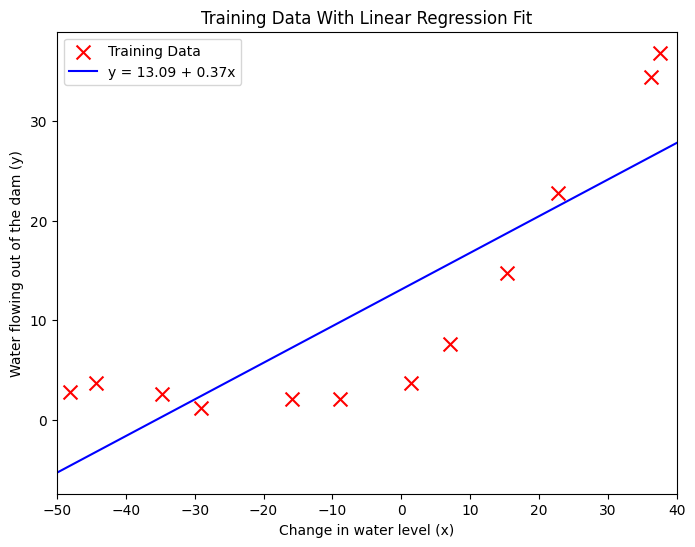

In [9]:
plots.plot_regression_fit(
    x,
    y,
    model,
    x_label="Change in water level (x)",
    y_label="Water flowing out of the dam (y)",
)

## Learning curves
You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. Your job is to fill in learningCurve.m so that it returns a vector of errors for the training set and cross validation set.

To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set X. Specifically, for a training set size of i, you should use the first i examples (i.e., $X(1:i,:)$ and $y(1:i)$).

You can use the trainLinearReg function to find the θ parameters. Note that the lambda is passed as a parameter to the learningCurve function. After learning the θ parameters, you should compute the error on the training and cross validation sets. Recall that the training error for a dataset is defined as

$$J_{train}(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2]$$

In particular, note that the training error does not include the regularization term. One way to compute the training error is to use your existing cost function and set λ to 0 only when using it to compute the training error and cross validation error. When you are computing the training set error, make sure you compute it on the training subset (i.e., $X(1:n,:)$ and $y(1:n))$ (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set. You should store the computed errors in the vectors error train and error val.

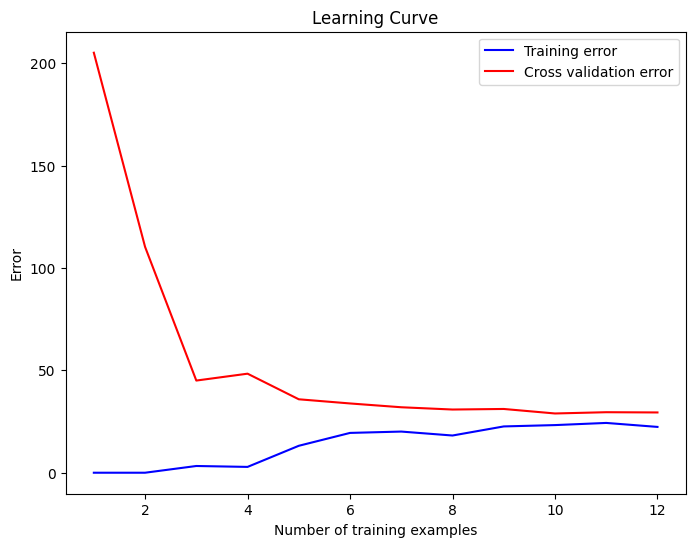

In [10]:
plots.plot_linear_regression_learning_curve(
    x, y, x_validation, y_validation, algorithms.LinearRegression()
)

In Figure 3, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model – the linear regression model is too simple and is unable to fit our dataset well. In the next section, you will
implement polynomial regression to fit a better model for this dataset.

# Part 2

## Polynomial regression
The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features.
For use polynomial regression, our hypothesis has the form:

$$h_{\theta}=\theta_0 + \theta_1 \cdot (waterLevel) + \theta_2 \cdot (waterLevel)^2 + ... +\theta_p \cdot (waterLevel)^p = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_px_p$$ 

Notice that by defining $x_1 = (waterLevel)$, $x)2 = (waterLevel)^2$, . . . , $x_p =
(waterLevel)^p$ , we obtain a linear regression model where the features are the
various powers of the original value (waterLevel).

Now, you will add more features using the higher powers of the existing feature x in the dataset. Your task in this part is to complete the code in polyFeatures.m so that the function maps the original training set X of size m × 1 into its higher powers. Specifically, when a training set X of size m × 1 is passed into the function, the function should return a m×p matrix X poly, where column 1 holds the original values of $X$, column 2 holds the values of $X^2$, column 3 holds the values of $X^3$, and so on. Note that you don’t have to account for the zero-eth power in this function. 

Now you have a function that will map features to a higher dimension, and Part 6 of ex5.m will apply it to the training set, the test set, and the cross validation set (which you haven’t used yet).

In [11]:
data = preprocessing.read_data(DATA_PATH, ("X", "y", "Xval", "yval", "Xtest", "ytest"))
x, y, x_validation, y_validation, x_test, y_test = data
x, x_validation, x_test = preprocessing.include_intercept((x, x_validation, x_test))

## Learning Polynomial Regression
After you have completed polyFeatures.m, the ex5.m script will proceed to train polynomial regression using your linear regression cost function. Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with $x = 40$ will now have a feature $x_8 = 40^8 = 6.5 \times 10^{12}$ ). Therefore, you will need to use feature normalization.

Before learning the parameters θ for the polynomial regression, ex5.m will first call featureNormalize and normalize the features of the training set, storing the mu, sigma parameters separately. We have already implemented this function for you and it is the same function from the first exercise.

In [12]:
p = 5
model = algorithms.PolynomialRegression(p, 0)
model.fit(x, y)

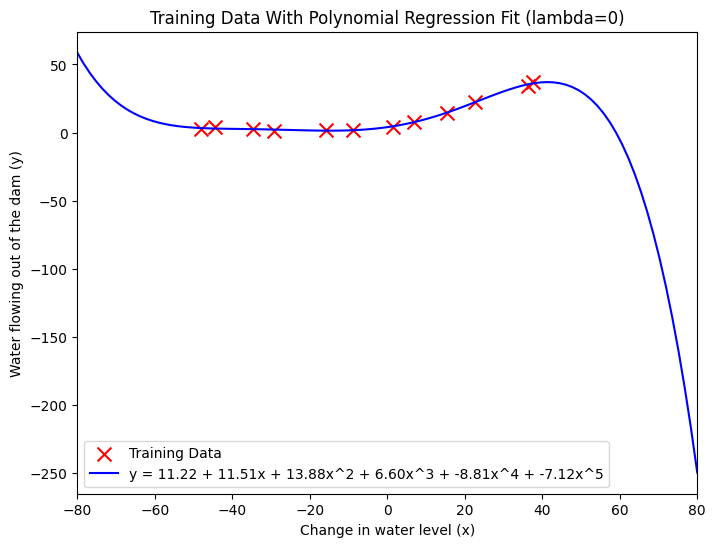

In [13]:
plots.plot_regression_fit(
    x,
    y,
    model,
    title="Training Data With Polynomial Regression Fit (lambda=0)",
    x_label="Change in water level (x)",
    y_label="Water flowing out of the dam (y)",
    x_min=-80,
    x_max=80,
)

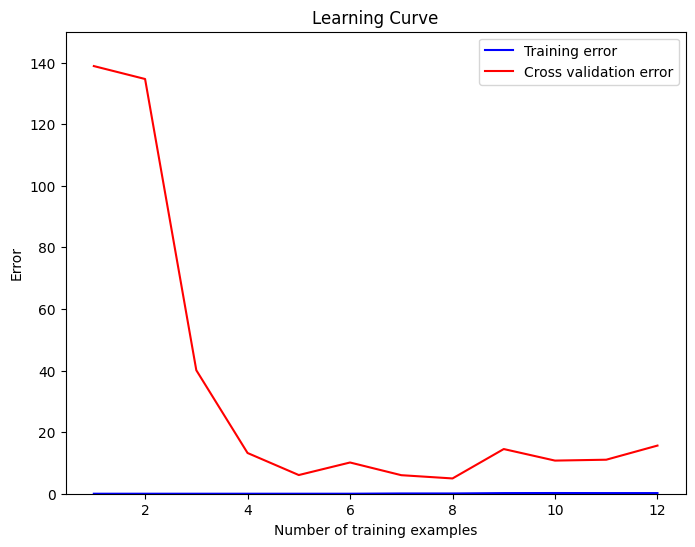

In [14]:
plots.plot_polynomial_regression_learning_curve(
    x, y, x_validation, y_validation, algorithms.PolynomialRegression(p, 0)
)

## Adjusting the regularization parameter
In this section, you will get to observe how the regularization parameter affects the bias-variance of regularized polynomial regression. You should now modify the the lambda parameter in the ex5.m and try λ = 1, 100. For each of these values, the script should generate a polynomial fit to the data and also a learning curve.

For λ = 1, you should see a polynomial fit that follows the data trend well (Figure 6) and a learning curve (Figure 7) showing that both the cross validation and training error converge to a relatively low value. This shows the λ = 1 regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

For λ = 100, you should see a polynomial fit (Figure 8) that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

In [15]:
p = 5
model = algorithms.PolynomialRegression(p, 1)
model.fit(x, y)

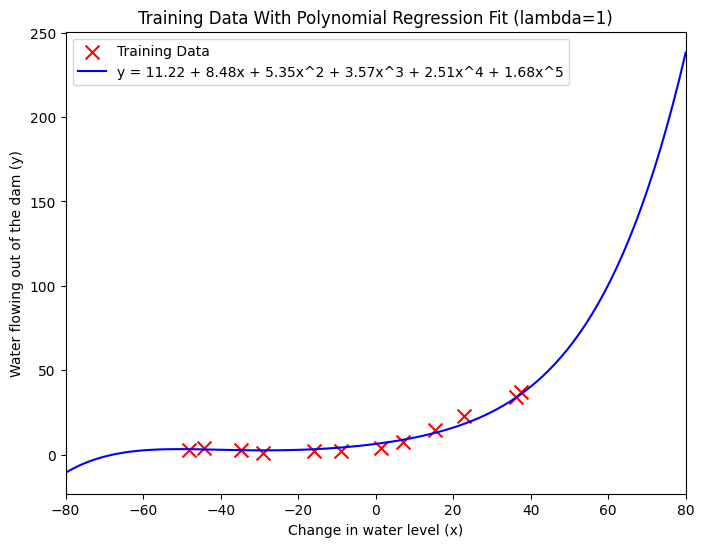

In [16]:
plots.plot_regression_fit(
    x,
    y,
    model,
    title="Training Data With Polynomial Regression Fit (lambda=1)",
    x_label="Change in water level (x)",
    y_label="Water flowing out of the dam (y)",
    x_min=-80,
    x_max=80,
)

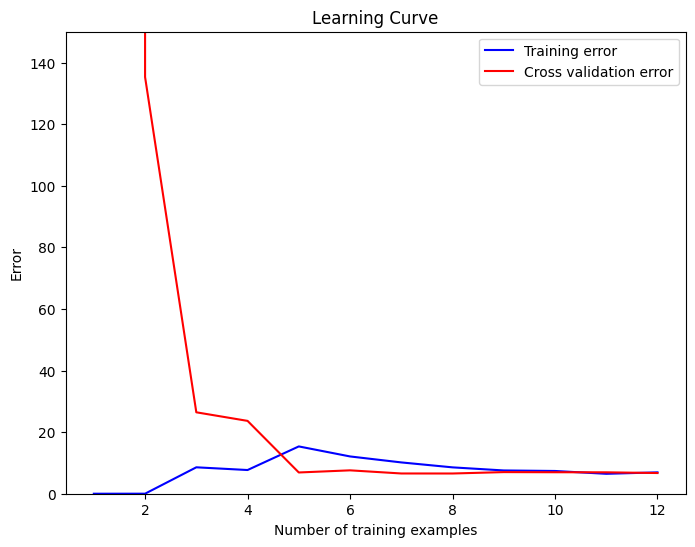

In [17]:
plots.plot_polynomial_regression_learning_curve(
    x, y, x_validation, y_validation, algorithms.PolynomialRegression(p, 1)
)

In [18]:
p = 5
model = algorithms.PolynomialRegression(p, 100)
model.fit(x, y)

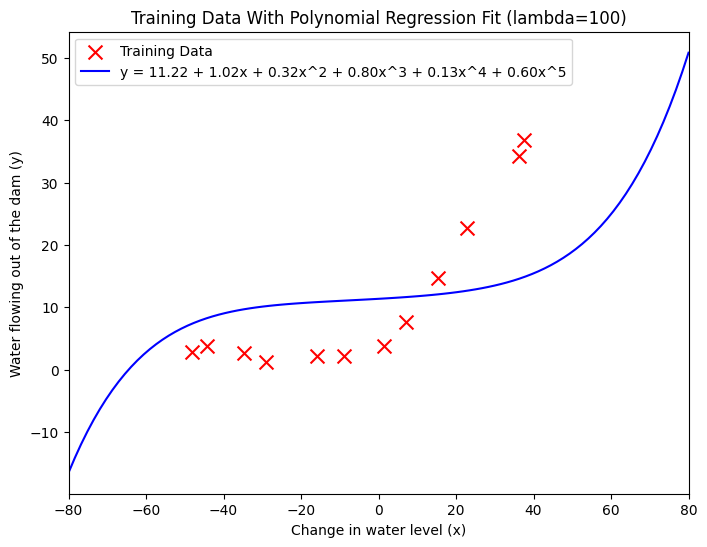

In [19]:
plots.plot_regression_fit(
    x,
    y,
    model,
    title="Training Data With Polynomial Regression Fit (lambda=100)",
    x_label="Change in water level (x)",
    y_label="Water flowing out of the dam (y)",
    x_min=-80,
    x_max=80,
)

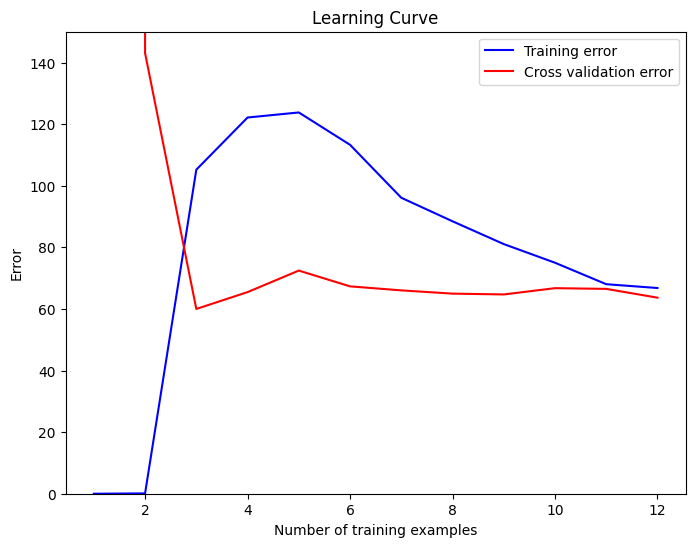

In [20]:
plots.plot_polynomial_regression_learning_curve(
    x, y, x_validation, y_validation, algorithms.PolynomialRegression(p, 100)
)

## Selecting λ using a cross validation set
From the previous parts of the exercise, you observed that the value of λ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regular- ization (λ = 0) fits the training set well, but does not generalize. Conversely, a model with too much regularization (λ = 100) does not fit the training set and testing set well. A good choice of λ (e.g., λ = 1) can provide a good fit to the data.

In this section, you will implement an automated method to select the λ parameter. Concretely, you will use a cross validation set to evaluate how good each λ value is. After selecting the best λ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Your task is to complete the code in validationCurve.m. Specifically, you should should use the trainLinearReg function to train the model using different values of λ and compute the training error and cross validation error. You should try λ in the following range: ${0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}$.

After you have completed the code, the next part of ex5.m will run your function can plot a cross validation curve of error v.s. λ that allows you select which λ parameter to use.

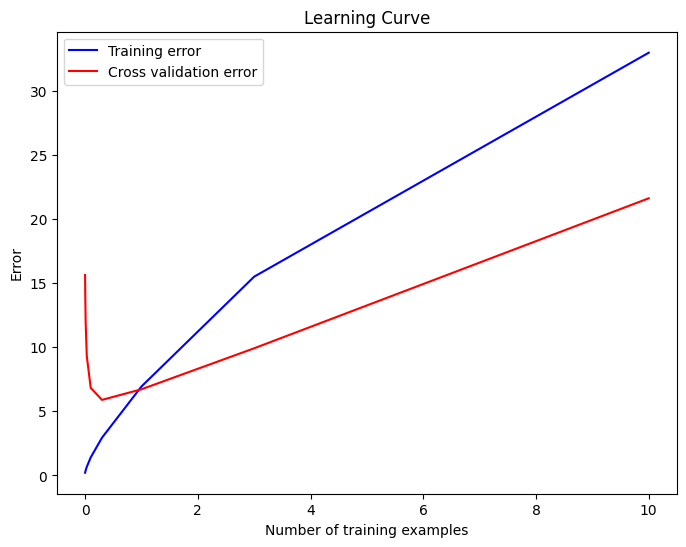

In [21]:
plots.plot_polynomial_regression_learning_curve_for_lambdas(
    x, y, x_validation, y_validation, [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
)